## **Simple Linear Regression Implementation using Gradient Descent**


#### **Import Necessary Libraries**


In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
plt.style.use("seaborn-v0_8-darkgrid")

### **Generate Linear Data with Noise**


In [123]:
n_samples = 100
slope = 2.5
intercept = 5
noise_level = 3
np.random.seed(42)

X = np.linspace(0, 10, n_samples)

y_true = slope * X + intercept
y = y_true + np.random.normal(0, noise_level, n_samples)

#### **Plot the Original Data**


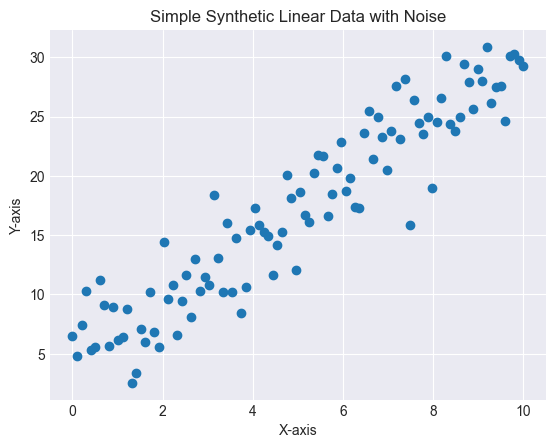

In [124]:
plt.scatter(X, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Simple Synthetic Linear Data with Noise")
plt.show()

### **Linear Regression Full Implementation**


---


**Hypothesis Function**
$$h_\theta(x) = \theta_0 + \theta_1 x$$


In [125]:
def hypothesis_function(X, theta_0, theta_1):
    return theta_0 + theta_1 * X

**Error Calculation**:
$$\text{Error} = h_x - y$$


In [126]:
# Calculate the error between the predicted and actual values
def calc_error(h_x, y):
    return h_x - y

**Cost Function $J(\theta)$ (MSE)**

$$J(\theta) = \frac{\| \text{Error} \|_2^2}{2m}$$


In [127]:
# Compute the cost function (Mean Squared Error in this case)
def cost_function(error):
    m = error.shape[0]
    return (np.linalg.norm(error) ** 2) / (2 * m)

**Compute the Gradient**

$$\frac{\partial}{\partial \theta_0} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_1^{(i)}$$


In [128]:
def compute_gradient(error, X):
    """Return the gradients with respect to theta_0 and theta_1."""
    m = X.shape[0]
    d_theta_0 = np.sum(error) / m
    d_theta_1 = np.dot(error, X) / m
    return d_theta_0, d_theta_1

**Gradient Descent Function Update Rules**

$$\theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\boldsymbol{\theta})$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta})$$


In [129]:
def update_theta(theta_0, d_theta_0, theta_1, d_theta_1, lr):
    """Update theta values using the gradients and learning rate."""
    theta_0 -= lr * d_theta_0
    theta_1 -= lr * d_theta_1
    return theta_0, theta_1

**Gradient Descent Function**


This function performs gradient descent, stores theta values, loss, and predictions for each iteration, and implements stop criteria based on the change in cost and gradient norm.


In [130]:
def gradient_descent(
    X, y, lr=0.1, max_iter=10000, loss_threshold=0.00001, gradient_threshold=0.01
,details=False):
    """Return ->
    all_theta_0, all_theta_1, loss, hypothesis, theta_0_opt, theta_1_opt"""

    theta_0, theta_1 = 0, 0
    m = len(y)
    loss = []
    hypothesis = []
    all_theta_0 = [theta_0]
    all_theta_1 = [theta_1]

    for i in range(max_iter):
        if details:
            print(f"{"*"*25} Iteration {i+1} {"*"*25}\n")

        # Compute predictions
        h_x = hypothesis_function(X, theta_0, theta_1)
        hypothesis.append(h_x)
        if details:
            print("h(x):", h_x,"\n")

        # Calculate error
        error = calc_error(h_x, y)
        if details:
            print("Error Vector:\n", error,"\n")

        # Compute cost (Mean Squared Error)
        J_theta = cost_function(error)
        loss.append(J_theta)
        if details:
            print("J(θ):", J_theta,"\n")


        # Check for convergence based on loss difference
        if i > 0 and np.abs(loss[i - 1] - loss[i]) < loss_threshold:
            print(f"Loss change convergence achieved at Iteration: {i + 1}")
            break

        # Compute gradients
        d_theta_0, d_theta_1 = compute_gradient(error, X)
        if details:
            print("▽(θ₀):", d_theta_0 )
            print("▽(θ₁):", d_theta_1,"\n")

        # Compute gradient norm
        gradient_vector = np.array([[d_theta_0], [d_theta_1]])
        gradient_norm = np.linalg.norm(gradient_vector)
        if details:
            print("Gradient Vector:\n",gradient_vector,"\n")
            print("Gradient Vector Norm:",gradient_norm,"\n")

        # Check for convergence based on gradient norm
        if gradient_norm < gradient_threshold:
            print(f"Gradient norm convergence achieved at iteration {i + 1}")
            break

        # Update parameters
        theta_0, theta_1 = update_theta(theta_0, d_theta_0, theta_1, d_theta_1, lr)
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        if details:
            print("Updated_θ₀: ", theta_0)
            print("Updated_θ₁: ", theta_1,"\n\n")

    return all_theta_0, all_theta_1, loss, hypothesis, theta_0, theta_1

#### **Train Model**


In [131]:
lr = 0.01
max_iter = 1000

all_theta_0, all_theta_1, loss, hypothesis, theta_0_opt, theta_1_opt = gradient_descent(
    X,
    y,
    lr=lr,
    max_iter=max_iter,
    loss_threshold=0.01,
    gradient_threshold=0.001,
    details=False,
)


print("Optimum θ₀:", theta_0_opt)
print("Optimum θ₁:", theta_1_opt)

Loss change convergence achieved at Iteration: 17
Optimum θ₀: 0.6284457236440723
Optimum θ₁: 3.1168159820637436


#### **Predict y values using the LR equation**

$$h_\theta(x) = \theta_0 + \theta_1 x$$


In [132]:
y_pred = hypothesis_function(X, theta_0_opt, theta_1_opt)

#### **Evaluate Model**


**Use R2 score to evaluate LR equation output**

https://en.wikipedia.org/wiki/Coefficient_of_determination


In [133]:
# Calculate R² score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    return r2

In [134]:
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.8216395629699742


#### **Visualization**


##### **Plot the Best Regression Line**


In [135]:
def best_regression_line(X, y, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label="Data with Noise")
    plt.plot(X, y_pred, "r", label="Best Fit Line")
    plt.title("Best Regression Line")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()

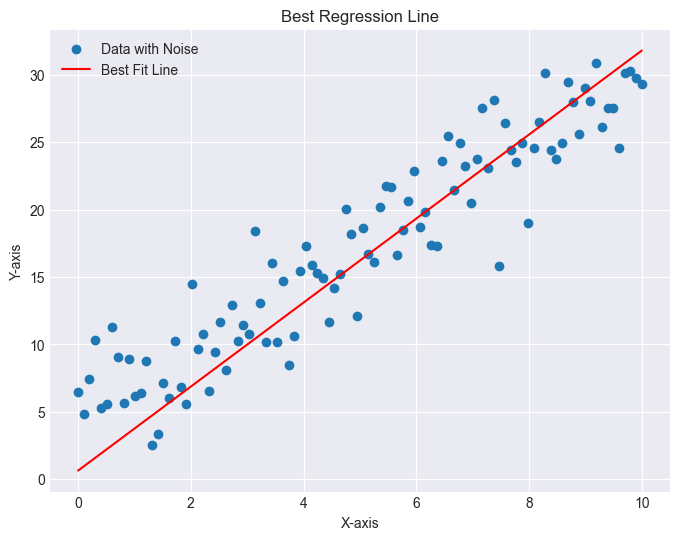

In [136]:
best_regression_line(X, y, y_pred)

##### **Plot Loss vs. Epochs**


In [137]:
def plot_loss_vs_epochs(loss):
    plt.figure(figsize=(12, 6))
    plt.plot(loss, ".-r")
    plt.xlabel(f"Epochs: {len(loss)}")
    plt.ylabel("Loss")
    plt.title("Loss VS Epoch")

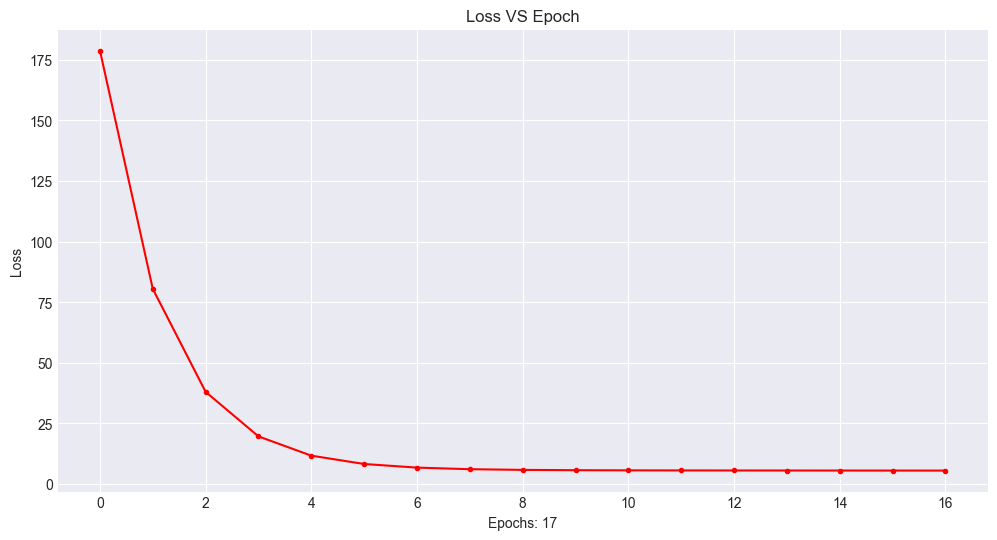

In [138]:
plot_loss_vs_epochs(loss)

##### **Plot Theta vs. Loss**


In [139]:
def loss_vs_theta(all_theta_0, all_theta_1, loss, lr):
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Loss vs. Theta | Learning Rate = {lr}", fontweight="bold")

    # loss vs theta_0
    plt.subplot(1, 2, 1)
    plt.plot(all_theta_0, loss, "o-r")
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")

    # loss vs theta_1
    plt.subplot(1, 2, 2)
    plt.plot(all_theta_1, loss, "o-r")
    plt.xlabel("Theta 1")

    plt.tight_layout()
    plt.show()

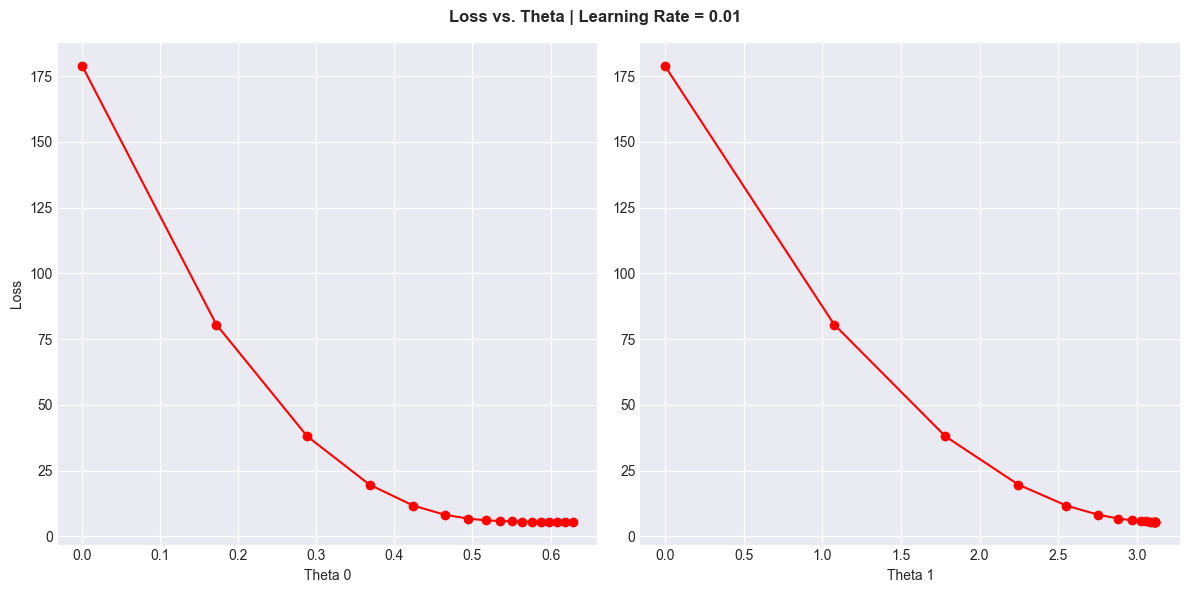

In [140]:
loss_vs_theta(all_theta_0, all_theta_1, loss, lr)

##### **Plot All Regression Lines Till Convergence**


In [141]:
def regression_lines(hypothesis, X, y):
    plt.figure(figsize=(8, 6))

    plt.scatter(X, y)
    for i in range(len(hypothesis)):
        plt.plot(X, hypothesis[i])

    plt.title("Regression Lines Till Convergence")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

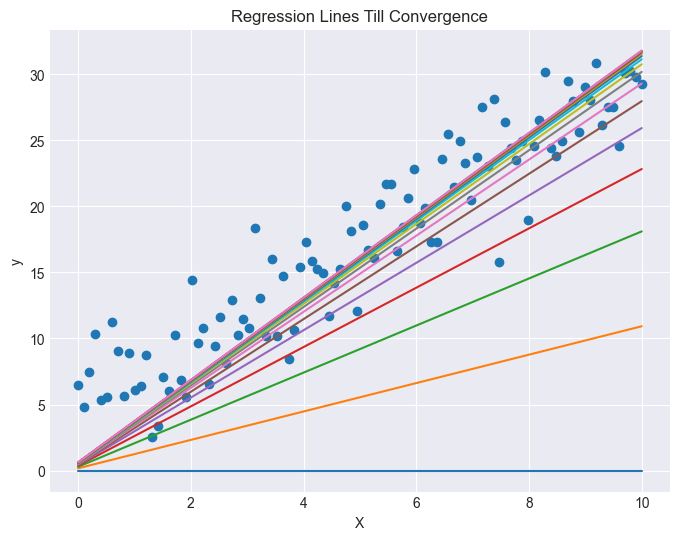

In [142]:
regression_lines(hypothesis, X, y)

---


#### **Experiment with Different Learning Rates and Iterations**


In [143]:
lr = 0.0001
max_iter = 1000
all_theta_0, all_theta_1, loss, hypothesis, theta_0_opt, theta_1_opt = gradient_descent(
    X,
    y,
    lr=lr,
    max_iter=max_iter,
    loss_threshold=0.01,
    gradient_threshold=0.001,
    details=False,
)

print("Optimum θ₀:", theta_0_opt)
print("Optimum θ₁:", theta_1_opt)

Loss change convergence achieved at Iteration: 700
Optimum θ₀: 0.49874972498422254
Optimum θ₁: 2.8480984842552446


In [144]:
y_pred = hypothesis_function(X, theta_0_opt, theta_1_opt)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.7729451981353544


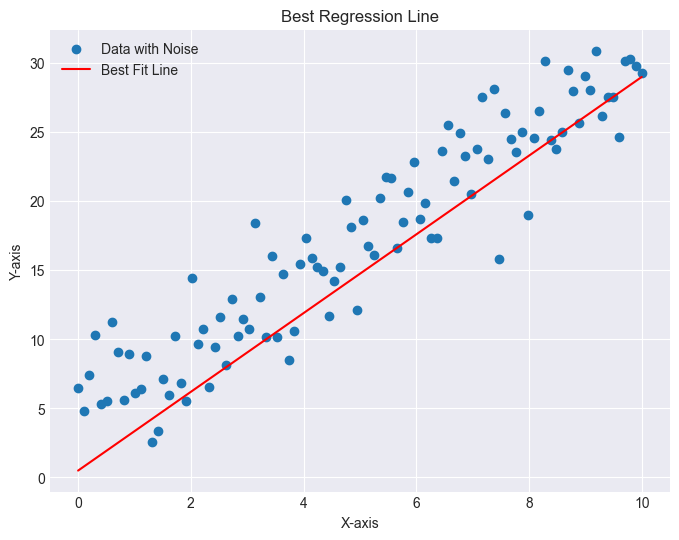

In [145]:
best_regression_line(X, y, y_pred)

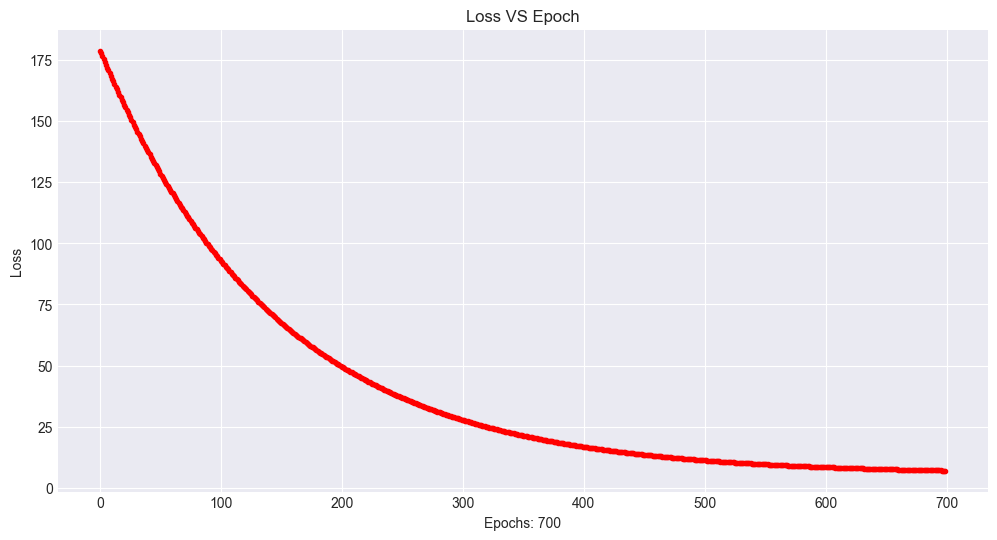

In [146]:
plot_loss_vs_epochs(loss)

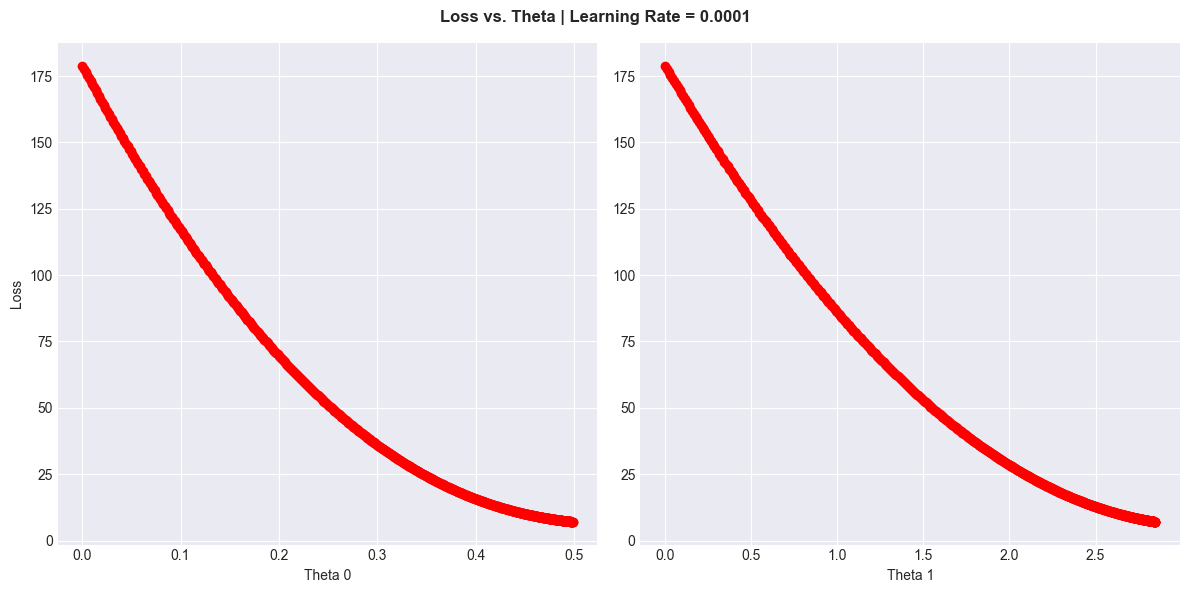

In [147]:
loss_vs_theta(all_theta_0, all_theta_1, loss, lr)

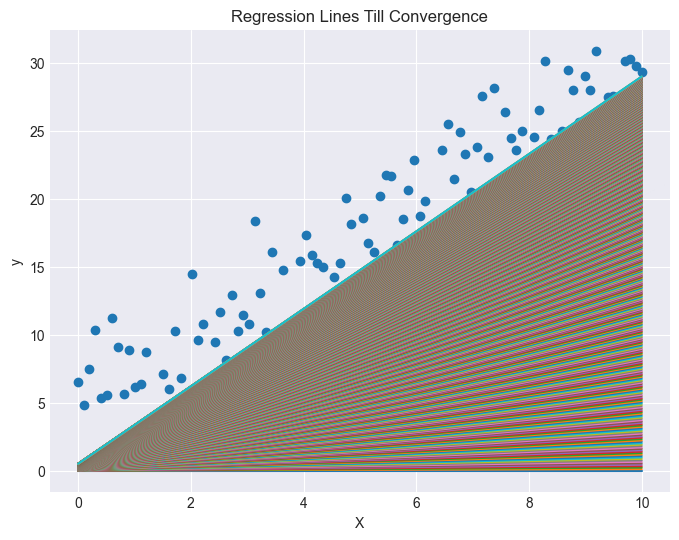

In [148]:
regression_lines(hypothesis, X, y)

---


In [149]:
lr = 0.02
max_iter = 1000
all_theta_0, all_theta_1, loss, hypothesis, theta_0_opt, theta_1_opt = gradient_descent(
    X,
    y,
    lr=lr,
    max_iter=max_iter,
    loss_threshold=0.001,
    gradient_threshold=0.001,
    details=False,
)

print("Optimum θ₀:", theta_0_opt)
print("Optimum θ₁:", theta_1_opt)

Loss change convergence achieved at Iteration: 304
Optimum θ₀: 3.5940538718782116
Optimum θ₁: 2.674825601971513


In [150]:
y_pred = hypothesis_function(X, theta_0_opt, theta_1_opt)
r2_score(y, y_pred)

np.float64(0.8789577047134142)

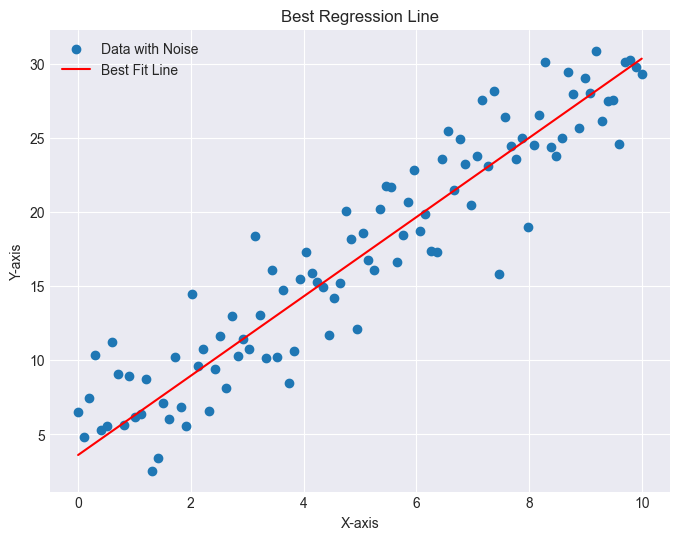

In [151]:
best_regression_line(X, y, y_pred)

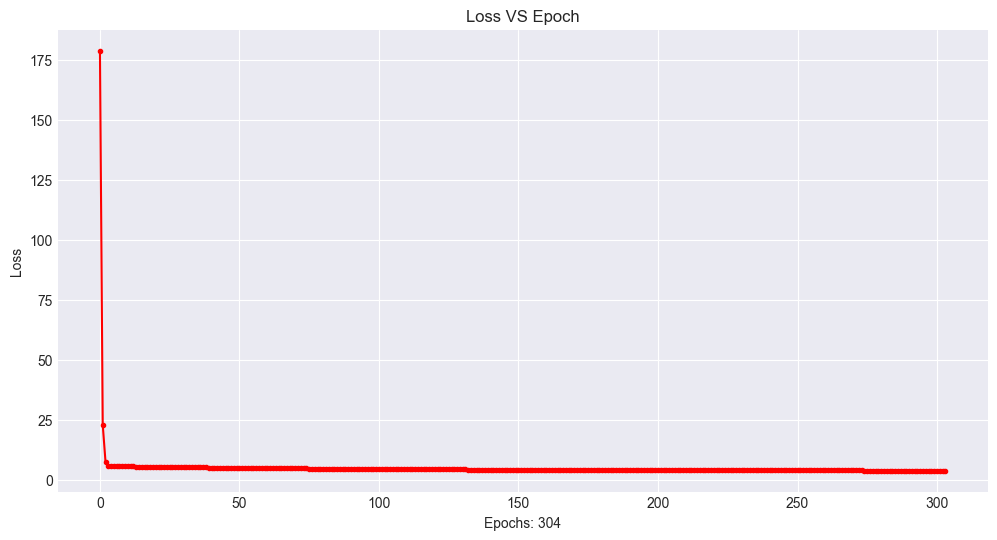

In [152]:
plot_loss_vs_epochs(loss)

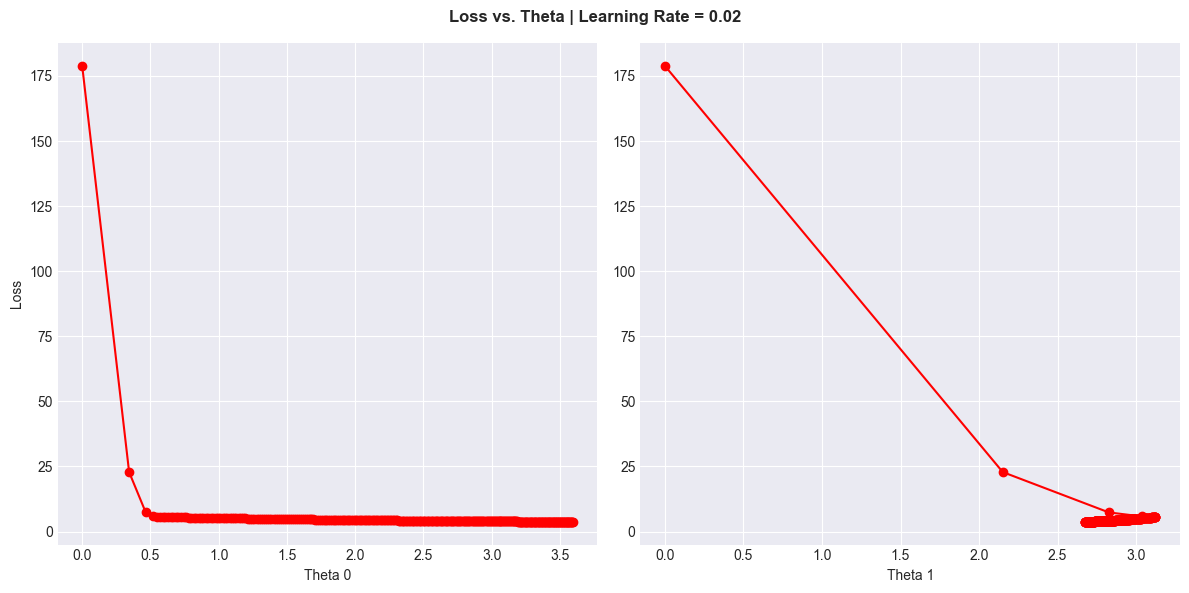

In [153]:
loss_vs_theta(all_theta_0, all_theta_1, loss, lr)

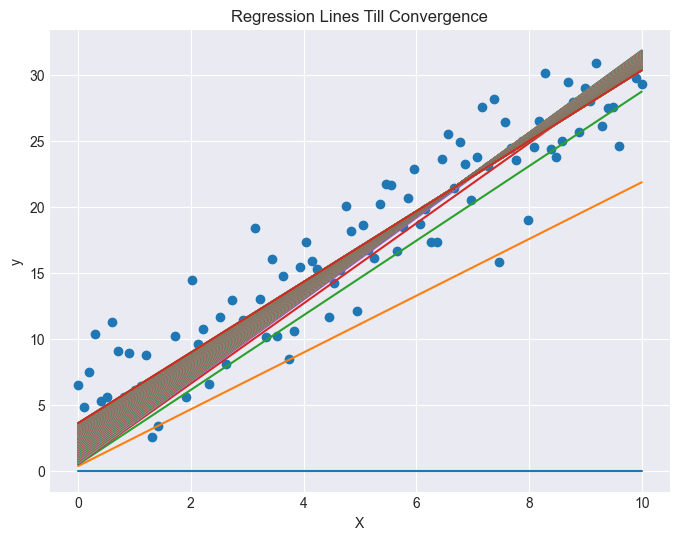

In [154]:
regression_lines(hypothesis, X, y)